[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/11J9Kdyl8zi1cPmmzb_cvrRbj07IQ-6TZ?usp=sharing)

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/f_DailyDelhiClimate.csv'
climate_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
climate_data.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# Preprocessing the data

# Convert 'date' to datetime format
climate_data['date'] = pd.to_datetime(climate_data['date'])

# Check for missing values
missing_values = climate_data.isnull().sum()

# Normalize the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
climate_data[numerical_columns] = scaler.fit_transform(climate_data[numerical_columns])

# Display the first few rows after preprocessing and the missing values
climate_data.head(), missing_values


(        date  meantemp  humidity  wind_speed  meanpressure
 0 2013-01-01 -2.109500  1.415439   -1.491699      0.025321
 1 2013-01-02 -2.463454  1.862828   -0.838196      0.037162
 2 2013-01-03 -2.495219  1.564569   -0.475626      0.041972
 3 2013-01-04 -2.291015  0.630022   -1.221233      0.033647
 4 2013-01-05 -2.654044  1.554627   -0.680303      0.029946,
 date            0
 meantemp        0
 humidity        0
 wind_speed      0
 meanpressure    0
 dtype: int64)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

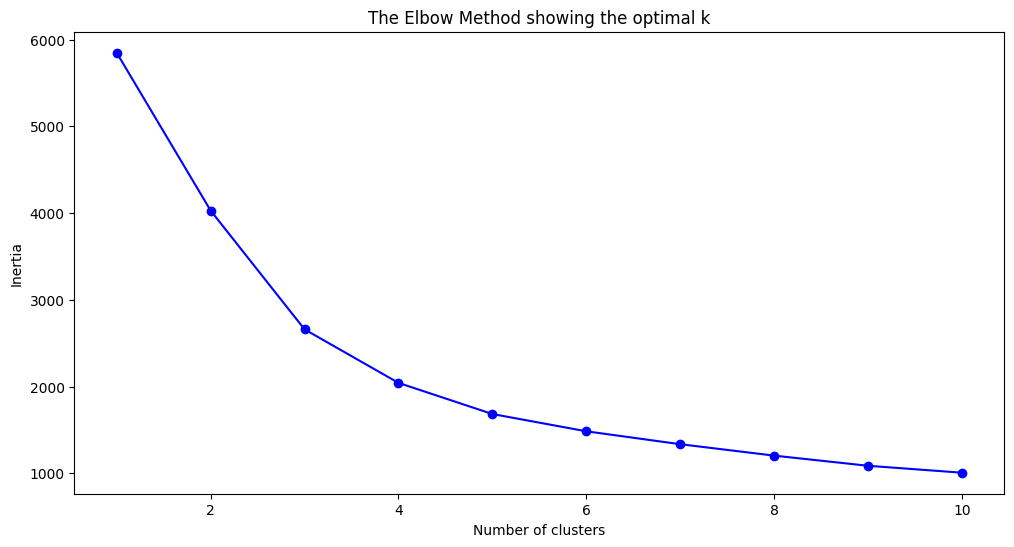

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(climate_data[numerical_columns])
    inertia.append(kmeanModel.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [ ]:
# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
climate_data['cluster'] = kmeans.fit_predict(climate_data[numerical_columns])

# Checking the distribution of the data points among the clusters
cluster_distribution = climate_data['cluster'].value_counts()

# Displaying the first few rows with the cluster labels and the cluster distribution
climate_data.head(), cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(        date  meantemp  humidity  wind_speed  meanpressure  cluster
 0 2013-01-01 -2.109500  1.415439   -1.491699      0.025321        0
 1 2013-01-02 -2.463454  1.862828   -0.838196      0.037162        0
 2 2013-01-03 -2.495219  1.564569   -0.475626      0.041972        0
 3 2013-01-04 -2.291015  0.630022   -1.221233      0.033647        0
 4 2013-01-05 -2.654044  1.554627   -0.680303      0.029946        0,
 0    778
 1    683
 2      1
 Name: cluster, dtype: int64)

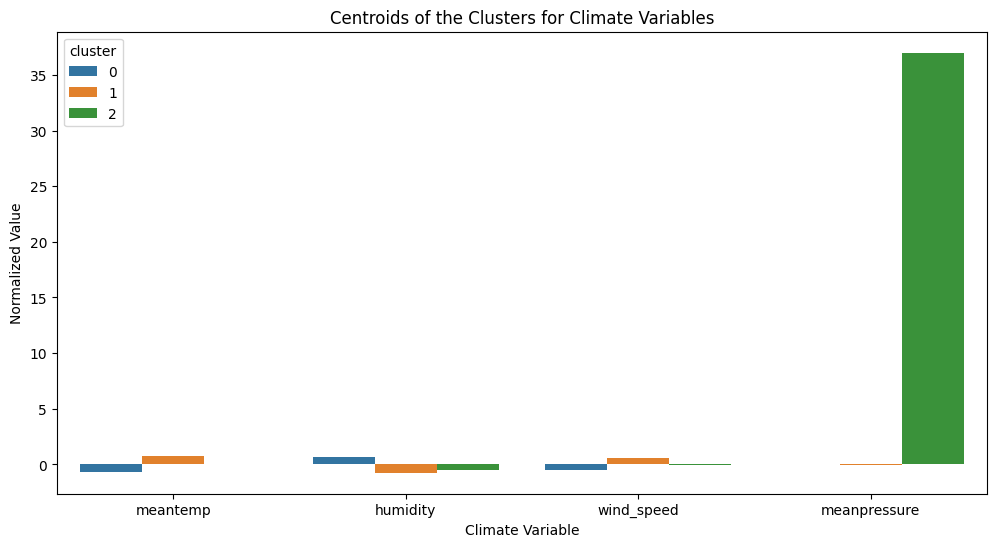

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the cluster centroids
centroids = kmeans.cluster_centers_

# Creating a DataFrame for the centroids for easier visualization
centroids_df = pd.DataFrame(centroids, columns=numerical_columns)
centroids_df['cluster'] = centroids_df.index

# Melting the DataFrame for easier plotting
centroids_melted = pd.melt(centroids_df, id_vars=['cluster'], value_vars=numerical_columns)

# Plotting the centroids of each cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='variable', y='value', hue='cluster', data=centroids_melted)
plt.title('Centroids of the Clusters for Climate Variables')
plt.xlabel('Climate Variable')
plt.ylabel('Normalized Value')
plt.show()
